In [1]:
# uploading csv and json files for flatiron lesson
# source: https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92
from google.colab import files
uploaded = files.upload()

Saving case_study.csv to case_study.csv


# Hypothesis Testing - Cumulative Lab

## Introduction

In this cumulative lab, you will use pandas to clean up a dataset and perform some EDA, then perform statistical tests and interpret their results in order to answer some business questions.

## Objectives

You will be able to:

* Practice using a data dictionary
* Practice using pandas to prepare data for statistical analysis
* Practice identifying an appropriate statistical test for a given question
* Practice defining the null and alternative hypotheses
* Practice executing statistical tests and interpreting their results

## Your Task: Analyzing Health Trends

![tissues and tea mug](images/sick_day.jpg)

Photo by <a href="https://unsplash.com/@kellysikkema?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Kelly Sikkema</a> on <a href="/?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

### Business Understanding

Flatiron Health Insurance (FHI) is a growing private healthcare insurance provider founded on the premise that using data and analytics can improve the health insurance industry by providing better care and offerings to its patients. Every year, the Center for Disease Control (CDC) conducts surveys to understand the latest demographic, health, and fitness trends. You have been tasked with analyzing the recently published results of the 2017-2018 survey and providing your recommendations back to the Chief Analytics Officer and Chief Marketing Officer. You have been assigned the task of taking a first look at the data and beginning to answer several key questions:

1. How does health status, represented by average number of days with bad physical health in the past month (`PHYSHLTH`), differ by state?
2. Digging deeper into the data, what are some factors that impact health (demographics, behaviors, etc.)?

### Data Understanding

To get you started, the IT department formatted the data set into a tab delimited text file for only NY, NJ, and CT (FHI’s primary markets) called `case_study.csv`.

There is also a PDF data dictionary called `data_dictionary.pdf`, which explains the meanings of the features and codes contained in this dataset.

Both files are located in the `data/` directory of this repository.

Prior to each statistical test, you will need to perform some data preparation, which could include:

* Filtering out rows with irrelevant values
* Transforming data from codes into human-readable values
* Binning data to transform it from numeric to categorical
* Creating new columns based on queries of the values in other columns

For steps 2-5, you will need to select and execute an appropriate statistical test. Recall these tests we have learned so far:

1. [Chi-squared test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html): used for comparing a categorical feature against a categorical feature, to determine whether they are independent
2. [t-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html): used for comparing two categories of a numeric feature, to determine whether their means are the same across categories
3. [ANOVA](https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.anova_lm.html#statsmodels.stats.anova.anova_lm): used for comparing more than two categories of a numeric feature, to determine whether their means are the same across categories

### Requirements

#### 1. Prepare `PHYSHLTH` Data for Analysis

Using the data dictionary, ensure that you understand the meaning of the `PHYSHLTH` column. Then clean the data so that only valid records of `PHYSHLTH` remain.

#### 2. Describe the Distribution of Health Status by State

Does health status (`PHYSHLTH`) differ by state (`STATE_`)? If so, by how much, and is it statistically significant?

#### 3. Describe the Relationship between Health Status and Home Ownership Status

Does health status (`PHYSHLTH`) differ between home owners and renters (`RENTHOM1`)? If so, by how much, and is it statistically significant?

#### 4. Describe the Relationship between Chronic Sickness and Nicotine Use

Does chronic sickness (`PHYSHLTH >= 15`) differ based on nicotine use (various columns)? If so, by how much, and is it statistically significant?

#### 5. Choose Your Own Question

Thinking about the business case, what is another question that might be useful to answer? Perform all analysis steps to answer this question.

## 1. Prepare `PHYSHLTH` Data for Analysis

In the cells below, we include the relevant imports and load the data into a dataframe called `df`:

In [2]:
# Run this cell without changes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
# Run this cell without changes
df = pd.read_csv("case_study.csv", index_col=0, low_memory=False)
df

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303774,36.0,5.0,5152017,5,15,2017,1200.0,2017012245,2.017012e+09,NaN,...,3.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303775,36.0,6.0,6252017,6,25,2017,1200.0,2017012246,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303776,36.0,7.0,7212017,7,21,2017,1200.0,2017012247,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303777,36.0,7.0,7202017,7,20,2017,1200.0,2017012248,2.017012e+09,NaN,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0


Our main column of interest is called `PHYSHLTH`. We display summary statistics and plot a distribution below:

In [4]:
# Run this cell without changes
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

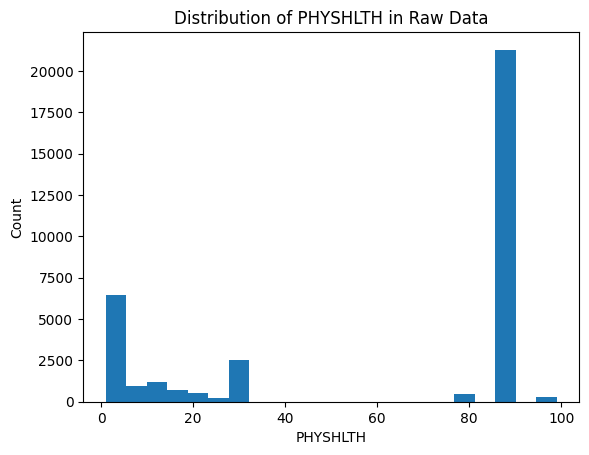

In [5]:
# Run this cell without changes
fig, ax = plt.subplots()
ax.hist(df["PHYSHLTH"], bins="auto")
ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Count")
ax.set_title("Distribution of PHYSHLTH in Raw Data");

This feature is supposed to represent the number of days with bad physical health out of the past 30 days. Do you see anything wrong with what is displayed above? Explain.

In [ ]:
# Replace None with appropriate text
"""
Looking at the data dictionary it would seem the numeric
variables are meant to be used as codes and not number of days.
Therefore, this barchart does not accurately represent the data.
"""

Look in the data dictionary, page 17, to understand what is happening with these values. Then edit the cell below so:

* The records where the `PHYSHLTH` value label is `None` are converted to 0
* The records where the `PHYSHLTH` value label is `Number of days` are kept as-is
* All other records are dropped (i.e. records with `Don't know/Not sure`, `Refused`, and `Not asked or Missing` value labels for `PHYSHLTH` are dropped)

In [ ]:
# Syntax: df.loc[ df[“column_name”] == “some_value”, “column_name”] = “value”

In [6]:
df_copy = df.copy()

In [7]:
# Your code here
df.loc[df['PHYSHLTH'] == 88, 'PHYSHLTH' ] = 0

In [8]:
df['PHYSHLTH']

49938     0.0
49939     0.0
49940     2.0
49941     0.0
49942     0.0
         ... 
303774    0.0
303775    0.0
303776    6.0
303777    0.0
303778    0.0
Name: PHYSHLTH, Length: 34545, dtype: float64

In [9]:
df = df.loc[df['PHYSHLTH'] < 31]

In [10]:
df.nunique()

_STATE        3
FMONTH       12
IDATE       373
IMONTH       12
IDAY         31
           ... 
_RFSEAT2      3
_RFSEAT3      3
_FLSHOT6      3
_PNEUMO2      3
_AIDTST3      3
Length: 358, dtype: int64

In [11]:
df['PHYSHLTH'].unique()

array([ 0.,  2., 28.,  5., 30.,  4.,  3., 15., 29.,  7., 10., 14.,  6.,
        1.,  8., 25., 20., 12., 18., 27., 21., 19., 22.,  9., 13., 17.,
       11., 16., 24., 26., 23.])

In [12]:
df['PHYSHLTH'].dtypes

dtype('float64')

In [13]:
df['PHYSHLTH'].value_counts()

0.0     21296
30.0     2438
2.0      1993
1.0      1538
3.0      1187
5.0      1092
10.0      751
7.0       641
15.0      640
4.0       622
20.0      402
14.0      326
6.0       187
25.0      159
8.0        99
21.0       70
12.0       69
28.0       57
29.0       35
27.0       22
18.0       19
16.0       16
17.0       15
9.0        15
22.0       12
13.0       10
19.0       10
11.0        8
24.0        7
26.0        7
23.0        4
Name: PHYSHLTH, dtype: int64

Run the code below to ensure you have the correct, cleaned dataframe:

In [14]:
# Run this cell without changes

# We should have fewer rows, the same number of columns
assert df.shape == (33747, 358)

# The maximum value in this column should now be 30
assert df["PHYSHLTH"].max() == 30.0

Now we can look at the same descriptive information on our cleaned data:

In [15]:
# Run this cell without changes
df['PHYSHLTH'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

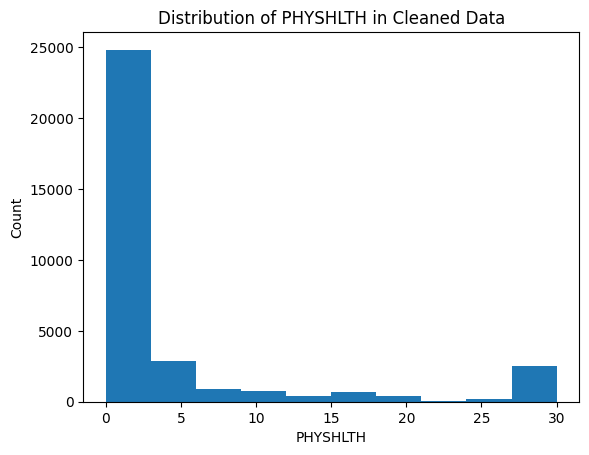

In [16]:
# Run this cell without changes
fig, ax = plt.subplots()
ax.hist(df["PHYSHLTH"])
ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Count")
ax.set_title("Distribution of PHYSHLTH in Cleaned Data");

That looks a lot more reasonable. Let's move on to the next step.

## 2. Describe the Distribution of Health Status by State

As mentioned previously, this dataset only includes data from three states.

In [17]:
# Run this cell without changes
df["_STATE"].value_counts()

36.0    11876
34.0    11458
9.0     10413
Name: _STATE, dtype: int64

Look in the data dictionary, pages 2-3, to determine which states map onto which codes. Then replace the numbers with strings representing the state names.

In [18]:
state_dict = {36: 'New York', 34: 'New Jersey', 9: 'Connecticut'}

df['_STATE'] = df['_STATE'].map(state_dict)
df['_STATE'].value_counts()

<ipython-input-18-08df2d71a964>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['_STATE'] = df['_STATE'].map(state_dict)


New York       11876
New Jersey     11458
Connecticut    10413
Name: _STATE, dtype: int64

In [19]:
df["_STATE"].value_counts()

New York       11876
New Jersey     11458
Connecticut    10413
Name: _STATE, dtype: int64

Below, we check the values:

In [20]:
# Run this cell without changes

# Shape should be the same
assert df.shape == (33747, 358)

# Values in state column should be changed
assert sorted(list(df["_STATE"].value_counts().index)) == ['Connecticut', 'New Jersey', 'New York']

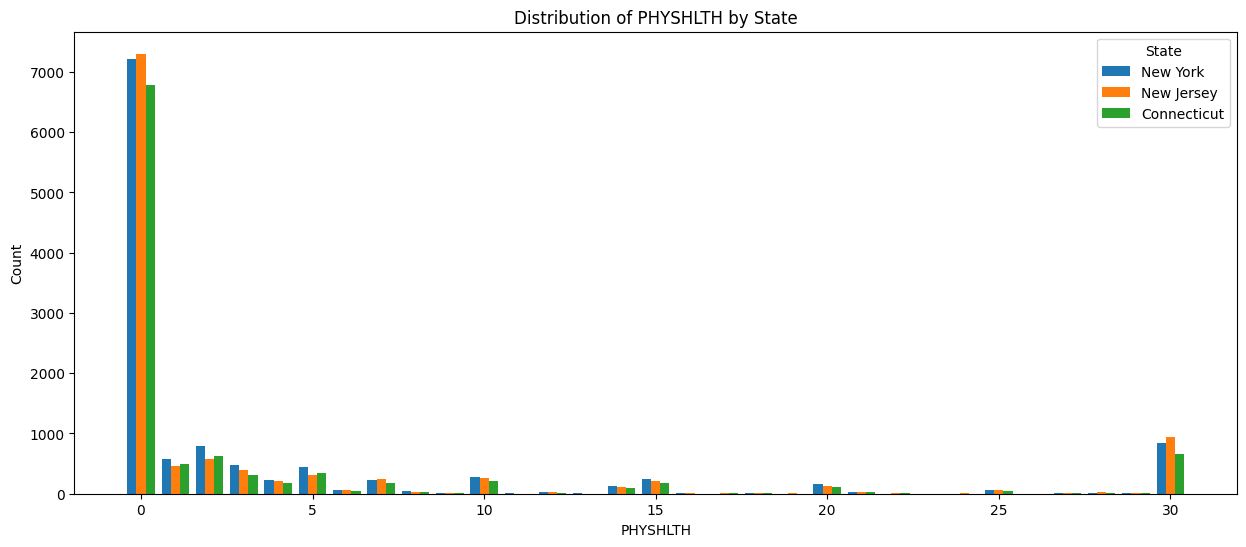

In [21]:
# Run this cell without changes

ny = df.loc[df["_STATE"] == "New York", "PHYSHLTH"]
nj = df.loc[df["_STATE"] == "New Jersey", "PHYSHLTH"]
ct = df.loc[df["_STATE"] == "Connecticut", "PHYSHLTH"]

fig, ax = plt.subplots(figsize=(15, 6))

ax.hist(
    x=[ny, nj, ct],
    label=["New York", "New Jersey", "Connecticut"],
    bins=range(32),
    align="left"
)

ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Count")
ax.set_title("Distribution of PHYSHLTH by State")

ax.legend(title="State");

Looking at the plot above, does the distribution seem to differ by state?

(Just answer based on a visual inspection; we will do the statistical assessment next.)

In [ ]:
# Replace None with appropriate text
"""
No, it does not.
"""

For the statistical test, we will be comparing the *means* of `PHYSHLTH` across states, as a representation of the overall distribution. In other words, when operationalizing the question **does `PHYSHLTH` differ by state?** we want to answer that in terms of the mean `PHYSHLTH`.

Let's look at those means:

In [22]:
# Run this cell without changes
df.groupby("_STATE")["PHYSHLTH"].mean()

_STATE
Connecticut    3.688562
New Jersey     4.380957
New York       4.148030
Name: PHYSHLTH, dtype: float64

You likely noted that the overall distribution looked about the same, but these means are different. We have a range from Connecticut with about 3.7 days of bad health to New Jersey with about 4.4 days. But is that difference statistically significant?

Identify which of the statistical tests you have learned is the most appropriate for this question, and why. Make sure you mention what kinds of variables are being compared (numeric and categorical), and how many categories there are.

In [ ]:
# Replace None with appropriate text
"""
We want to do a one-way ANOVA test as we want to analyze the numerical variance between groups.
We want to compare the PHYSHEALTH column. There are three states (Connecticut, New York, New Jersey)
represented in our dataset,and the constituents surveyed were able to provide an answer in the form
of a numerical value.
"""

Now, identify the null and alternative hypotheses:

In [ ]:
# Replace None with appropriate text
"""
H0 = There is no statistically significant difference in means of bad health days between NY, NJ, CT.
In other words, the average number of bad health days is equal or less than across the tri-state area.

Ha = There is a statistically significant difference in means of bad health days between NY, NJ, CT.
In other words, the average number of bad days is greater in one state than at least one other state.
"""

In the cell below, we set up and execute the statistical test for you. If this doesn't match your previous answer about which test to perform, look at the solution branch to understand why this is the appropriate test.

In [24]:
# Run this cell without changes
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'PHYSHLTH ~ C(_STATE)'
lm = ols(formula, df).fit()
sm.stats.anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
C(_STATE),2.0,2.687322e+03,1343.660882,18.558645,8.800607e-09
Residual,33744.0,2.443093e+06,72.400809,NaN,NaN


Interpret the results of this statistical test below. What is the calculated p-value? Were we able to reject the null hypothesis at an alpha of 0.05? What does this say about how `PHYSHLTH` varies by state? What recommendations would you make to the business?

In [ ]:
# Replace None with appropriate text
"""
The calculated p-value is 8.800607e-09 which is super low so the null must go!
It seems there is a significant difference in average bad health days between states.
I would recommend following up with a pairwise t test or a Tukey HSD test to see which states
are significantly different on average. And then dig into other variables and contributing factors to see why one state
has more bad health days that another. For example, maybe one area has a higher cost of living
which creates stress for residents, and then stress leads to more health issues.
Another example could be living in area with more industrial pollution, which is known to increase asthma rates,
drives up complaints of poor health.
"""

With that section wrapped up, let's move on to the next step.

## 3. Describe the Relationship between Health Status and Home Ownership Status

This time, we want to categorize respondents by demographic information: specifically, we'll look at whether or not they own their home.

Once again, this will require some data preparation. The variable of interest is contained in the `RENTHOM1` column. Currently the values look like this:

In [25]:
# Run this cell without changes
df["RENTHOM1"].value_counts()

1.0    21690
2.0    10244
3.0     1526
9.0      194
7.0       93
Name: RENTHOM1, dtype: int64

In the cell below, modify `df` so that we have dropped all records where the `RENTHOM1` value label is neither `Own` nor `Rent`, and we have replaced the numeric codes with `Own` and `Rent` respectively. You can find more information about codes on page 33 of the data dictionary.

Making copies to try different ways of accomplishing this task.

In [26]:
df_copy3 = df.copy()

In [27]:
df_copy4 = df.copy()

In [28]:
# confirming the data types
df['RENTHOM1'].dtypes

dtype('float64')

###Option 1:
 * Exclude any record that does not have 1.0 or 2.0 value
 * Then, map the dictionary

In [29]:
# Option 1: exclude any record that does not have 1.0 or 2.0 value
# Then, map the dictionary

df_copy3 = df_copy3[df_copy3['RENTHOM1'].isin([1.0, 2.0])]

rentown_dict = {1.0: 'Own', 2.0: 'Rent'}
df_copy3['RENTHOM1'] = df_copy3['RENTHOM1'].map(rentown_dict)


<ipython-input-29-6c61498929ee>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy3['RENTHOM1'] = df_copy3['RENTHOM1'].map(rentown_dict)


In [30]:
# sanity check
df_copy3["RENTHOM1"].value_counts()

Own     21690
Rent    10244
Name: RENTHOM1, dtype: int64

### Option 2:
* Map the dictionary
* Then drop the records with NaN values

In [31]:
# Option 2: map the dictionary
# Then drop the records with NaN values

rentown_dict = {1.0: 'Own', 2.0: 'Rent'}
df_copy4['RENTHOM1'] = df_copy4['RENTHOM1'].map(rentown_dict)

# drop rows where 'RENTHOM1' is NaN
df_copy4 = df_copy4.dropna(subset=['RENTHOM1'])


In [32]:
# sanity check
df_copy4["RENTHOM1"].value_counts()

Own     21690
Rent    10244
Name: RENTHOM1, dtype: int64

 ### I prefer option 1 so:

In [33]:
# Make df_copy_3 our main df
df = df_copy3

In [34]:
# Run this cell without changes
df["RENTHOM1"].value_counts()

Own     21690
Rent    10244
Name: RENTHOM1, dtype: int64

Below, we check that this was done correctly:

In [35]:
# Run this cell without changes

# Number of rows should be smaller again
assert df.shape == (31934, 358)

# Only two values should be present in this column
assert sorted(list(df["RENTHOM1"].value_counts().index)) == ['Own', 'Rent']

Now, similar to the previous step, create a plot that shows the distribution of `PHYSHLTH` for those who own vs. rent their homes, including appropriate axis labels and legend. Because there is more of an imbalance of categories this time (more than twice as many owners as renters, compared to nearly-even numbers from New York, New Jersey, and Connecticut), make sure you add the argument `density=True`, so that the y-axis shows the density (proportion) rather than the count.

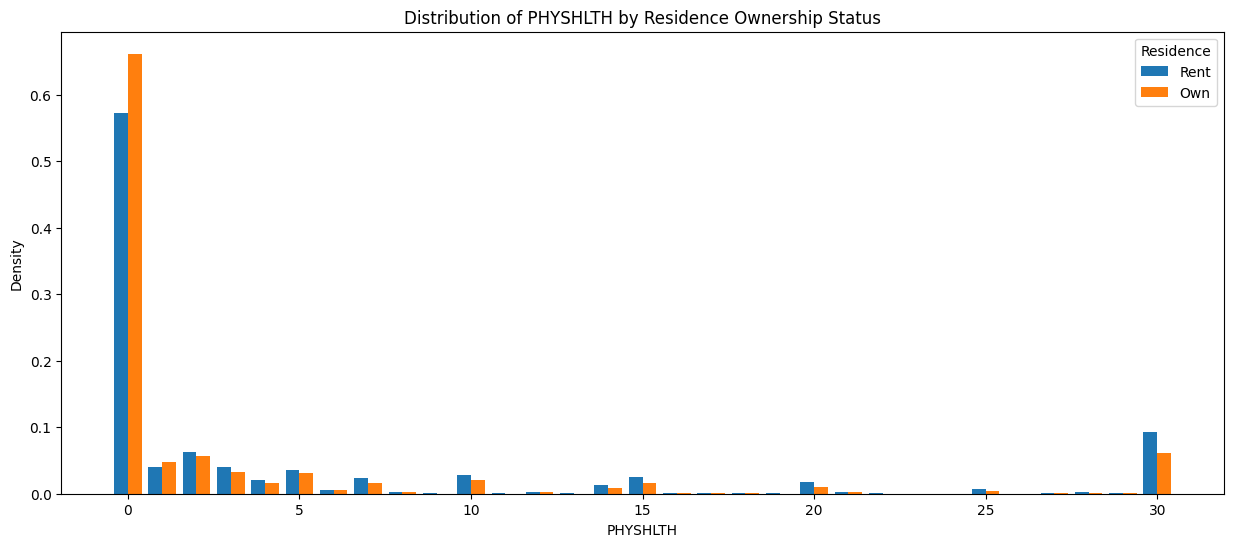

In [37]:
# Your code here

rent = df.loc[df["RENTHOM1"] == "Rent", "PHYSHLTH"]
own = df.loc[df["RENTHOM1"] == "Own", "PHYSHLTH"]


fig, ax = plt.subplots(figsize=(15, 6))

ax.hist(
    x=[rent, own],
    label=["Rent", "Own"],
    bins=range(32),
    align="left",
    density=True
)

ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Density")
ax.set_title("Distribution of PHYSHLTH by Residence Ownership Status")

ax.legend(title="Residence");

Then run this code to find the averages:

In [39]:
# Run this cell without changes
df.groupby("RENTHOM1")["PHYSHLTH"].mean()

RENTHOM1
Own     3.531213
Rent    5.197970
Name: PHYSHLTH, dtype: float64

Now, interpret the plot and averages. Does it seem like there a difference in the number of unhealthy days between those who rent their homes and those who own their homes? How does this compare to the distributions by state?

In [ ]:
# Replace None with appropriate text
"""
It seems to me that there is a noticeable difference; renters report more bad health days on average than home owners.
This could contribute to the difference in states if one state has a higher proportion of renters.
Also, dealing with landlords and building management is stressful, so these results make sense to me!
"""

Now, choose and execute an appropriate statistical test. Make sure you describe why you chose the test, the null and alternative hypotheses, and what the result of the test means.

In [ ]:
# Hypotheses
"""
H0: Renters report unhealthy days that, on average, are less than or equal to the unhealthy days reported by home owners.
Ha: Renters report more unhealthy days on average than home owners.
"""

In [ ]:
# test choice reason
"""
I want to compare two samples (renters and owners) so I will conduct a two sample t test.
It is right-tailed as I am interested in whether unhealthy days for renters are greater than unhealthy days for owners.
"""

In [41]:
# importing stats
from scipy import stats

# run two sample t test for my two independent groups
# alternative='greater' is used to perform a right-tailed test
t_stat, p_val = stats.ttest_ind(rent, own, alternative='greater')

print("T Statistic = ", t_stat)
print("P Value = ", p_val)

T Statistic =  16.435805439672
P Value =  9.39419628197452e-61


In [ ]:
# result meaning
"""
Since we already decided the alpha is 0.05
(which seems high for a health company, but that is what we have been given),
it is very clear that we must reject the null hypothesis.
There is a 95% chance that renters have more unhealthy days on average than home owners.

"""

## 4. Describe the Relationship between Chronic Sickness and Nicotine Use

Once again, this will require some preparation before we can run the statistical test. Create a new column `NICOTINE_USE` with 1 representing someone who uses or has used nicotine in some form, and 0 representing someone who hasn't.

We define nicotine use as:

* Answered `Yes` to the `SMOKE100` question (*Have you smoked at least 100 cigarettes in your entire life?*, page 43), OR
* Answered `Every day` or `Some days` to the `USENOW3` question (*Do you currently use chewing tobacco, snuff, or snus every day, some days, or not at all?*, page 46), OR
* Answered `Yes` to the `ECIGARET` question (*Have you ever used an e-cigarette or other electronic vaping product, even just one time, in your entire life?*, page 46)

If a record matches one or more of the above criteria, `NICOTINE_USE` should be 1. Otherwise, `NICOTINE_USE` should be 0. Go ahead and keep all of the "Don't know" or "Refused" answers as 0.

In [45]:
# Your code here

# instantiate the new column, with zero as default value
df['NICOTINE_USE'] = 0

# relevant_columns = ['SMOKE100','USENOW3','ECIGARET' ]
# create a mask to select the values from the relevant columns
# note: a "mask" is a sequence of boolean values used to filter data

smoke_mask = (
    # Label: Smoked at Least 100 Cigarettes
    (df['SMOKE100'] == 1) |

    #Label: Label: Use of Smokeless Tobacco Products
    (df['USENOW3'] == 1) |
    (df['USENOW3'] == 2) |

    #Label: Ever used an e-cigarette?
    (df['ECIGARET'] == 1)
)

# set values to 1 where the condition is true
df.loc[smoke_mask, 'NICOTINE_USE'] = 1

# Look at the distribution of values
df["NICOTINE_USE"].value_counts(normalize=True)

0    0.563036
1    0.436964
Name: NICOTINE_USE, dtype: float64

This time, let's treat health status as a categorical variable. We'll say that a "chronically sick" person is a person who reports that their physical health was not good for 15 or more out of the past 30 days. (This is a simplification but it will work for this analysis.)

In the cell below, create a new column of `df` called `CHRONIC`, which is 0 for records where `PHYSHLTH` is less than 15, and 1 for records where `PHYSHLTH` is 15 or more.

In [46]:
# Your code here
# instantiate the new column, with zero as default value
df['CHRONIC'] = 0

chronic_mask =(
    df['PHYSHLTH'] >= 15
)

# set values to 1 where the condition is true
df.loc[chronic_mask, 'CHRONIC'] = 1

# View the distribution of the newly-created column
df["CHRONIC"].value_counts()

0    28246
1     3688
Name: CHRONIC, dtype: int64

Now we can view the crosstabs for these two categorical variables, as well as display their distributions:

In [47]:
# Run this cell without changes
contingency_table = pd.crosstab(index=df["CHRONIC"], columns=df["NICOTINE_USE"])
contingency_table

NICOTINE_USE,0,1
CHRONIC,,
0,16332,11914
1,1648,2040


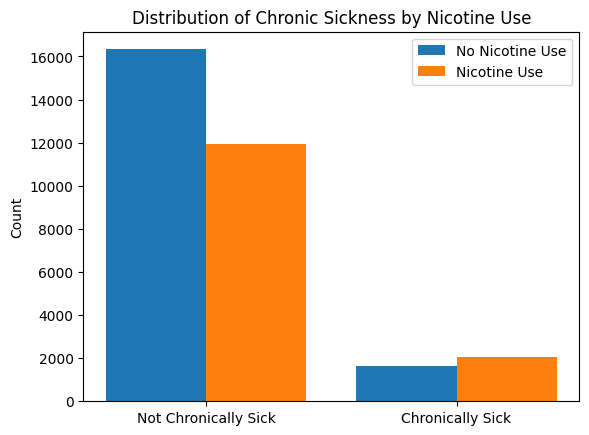

In [48]:
# Run this cell without changes

no_nicotine_use = df.loc[df["NICOTINE_USE"] == 0, "CHRONIC"]
nicotine_use = df.loc[df["NICOTINE_USE"] == 1, "CHRONIC"]

fig, ax = plt.subplots()

ax.hist(
    x=[no_nicotine_use, nicotine_use],
    label=["No Nicotine Use", "Nicotine Use"],
    bins=[0,1,2],
    align="left"
)

ax.set_ylabel("Count")
ax.set_xticks([0,1])
ax.set_xticklabels(["Not Chronically Sick", "Chronically Sick"])
ax.set_title("Distribution of Chronic Sickness by Nicotine Use")

ax.legend();

Once again, it appears that there is a difference in health outcomes between these categories. In the cell below, select an appropriate statistical test, describe the null and alternative hypotheses, execute the test, and interpret the result.

In [ ]:
# Your code here (create additional cells as needed)
# Hypotheses
"""
H0: Nicotine users, on average, are not significantly more likely to be chronically sick (or report 15 or more unhealthy days)
than those who do not use nicotine.
Ha: Nicotine users, on average, are more likely to be chronically sick (or report 15 or more unhealthy days)
than those who do not use nicotine.
"""

In [ ]:
# test choice reason
"""
I want to compare two samples (nicotine users and non) so I will conduct a two sample t test.
It is right-tailed as I am interested in whether there are more chronically sick nicotine users on average.
"""

In [49]:
# run two sample t test for my two independent groups
# alternative='greater' is used to perform a right-tailed test
t_stat, p_val = stats.ttest_ind(nicotine_use, no_nicotine_use, alternative='greater')

print("T Statistic = ", t_stat)
print("P Value = ", p_val)

T Statistic =  15.178807142427786
P Value =  3.707608082217449e-52


In [ ]:
# result meaning
"""
Since we already decided the alpha is 0.05
(which seems high for a health company, but that is what we have been given),
it is very clear that we must reject the null hypothesis.
There is a 95% chance that nicotine users will be chronically sick as we have defined it.

"""

## 5. Choose Your Own Question

Now that you have investigated physical health and chronic sickness and their relationships with state, home ownership, and nicotine use, you will conduct a similar investigation with variables of your choosing.

Select an independent variable based on looking at the information in the data dictionary, and perform any additional transformations needed to use it in an analysis. Then set up, execute, and interpret a statistical test that addresses the relationship between that independent variable and `PHYSHLTH`.

(There is no solution branch for this question, and feel free to move on if you have already spent more than 1.5 hours on this lab.)

###My own question: is there a statistically significant difference in number of unhealthy days between those who have recently smoked a cigarette within the last year and those who last smoked a year ago or more?
Here I define a smoker as somone who has smoked at least 5 packs of cigarettes.

Create a new column `RECENT_SMOKER` where the value is 1 if the respondent has smoked within the last year, and 0 if their last smoke was at least a year ago.




In [58]:
#creating a smokers-only dataframe

non_smoker_mask = (
 (df['SMOKE100'] == 2) |
 (df['SMOKE100'] == 7 )|
 (df['SMOKE100'] == 9)
 )
df_smokers = df[~non_smoker_mask]  # Keep only rows where non_smoker_mask is False


In [61]:
# instantiate the new column, with zero as default value
df_smokers['RECENT_SMOKER'] = 0

# relevant_columns = ['LASTSMK2', 'SMOKE100']
# create a mask to select the values from the relevant columns
# note: a "mask" is a sequence of boolean values used to filter data

recent_smoke_mask = (

    ((df_smokers['LASTSMK2'] == 1) |
    (df_smokers['LASTSMK2'] == 2) |
    (df_smokers['LASTSMK2'] == 3) |
    (df_smokers['LASTSMK2'] == 4))
    & (df_smokers['SMOKE100'] == 1)

)

# set values to 1 where the condition is true
df_smokers.loc[recent_smoke_mask, 'RECENT_SMOKER'] = 1

# Look at the distribution of values
df_smokers['RECENT_SMOKER'].value_counts(normalize=True)

<ipython-input-61-f689a93dba36>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_smokers['RECENT_SMOKER'] = 0


0    0.945449
1    0.054551
Name: RECENT_SMOKER, dtype: float64

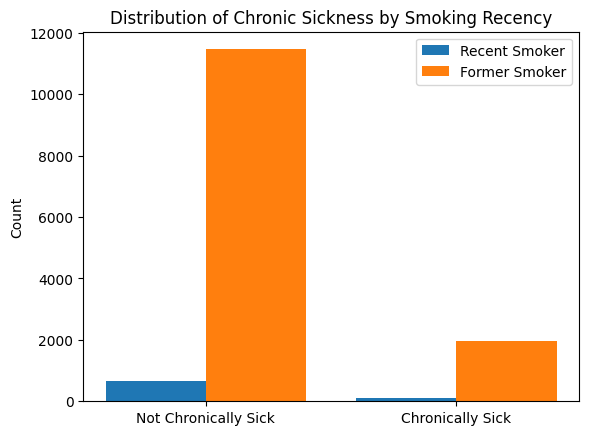

In [64]:
recent_smoker = df_smokers.loc[df_smokers['RECENT_SMOKER'] == 1, "CHRONIC"]
former_smoker = df_smokers.loc[df_smokers['RECENT_SMOKER'] == 0, "CHRONIC"]

fig, ax = plt.subplots()

ax.hist(
    x=[recent_smoker, former_smoker],
    label=["Recent Smoker", "Former Smoker"],
    bins=[0,1,2],
    align="left"
)

ax.set_ylabel("Count")
ax.set_xticks([0,1])
ax.set_xticklabels(["Not Chronically Sick", "Chronically Sick"])
ax.set_title("Distribution of Chronic Sickness by Smoking Recency")

ax.legend();

In [ ]:
# Your code here (create additional cells as needed)
# Hypotheses
"""
H0: Former smokers, on average, are not significantly less likely to be chronically sick (or report 15 or more unhealthy days)
than those who smoked recently.
Ha: Former smokers, on average, are less likely to be chronically sick (or report 15 or more unhealthy days)
than those who smoked recently.

In [66]:
# run two sample t test for my two independent groups
# alternative='less' is used to perform a left-tailed test
t_stat, p_val = stats.ttest_ind(recent_smoker, former_smoker, alternative='less')

print("T Statistic = ", t_stat)
print("P Value = ", p_val)

T Statistic =  0.21892362541184593
P Value =  0.5866436561760635


In [ ]:
# result meaning
"""
We fail to reject the null! This p value is quite high. So we cannot say that former smokers are less likely to
be chronically sick.

I wonder if the sample size was/is large enough and/or if other variable definitions should be applied.
Perhaps we need to look at people who have smoked for longer. 5 packs of cigarettes is not that many.
I would think that this is perhaps too wide a range when it comes to defining a smoker.
It would also be interesting to plot out several independent groups based on more granular filtering by smoker
category.
"""

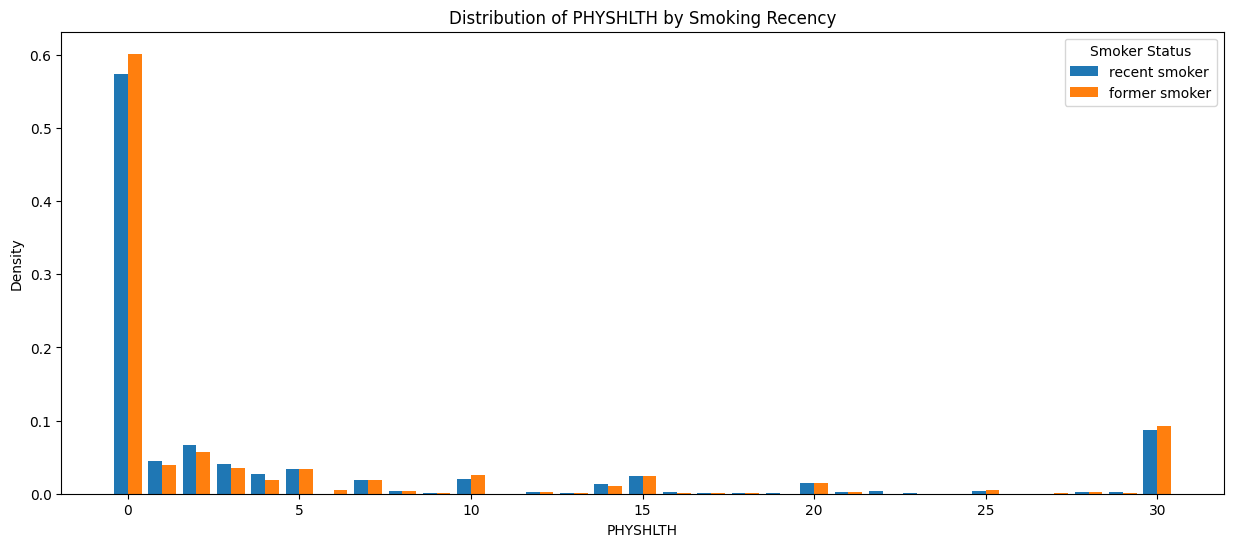

In [69]:
# one last graph!

recent_smoker = df_smokers.loc[df_smokers['RECENT_SMOKER'] == 1, "PHYSHLTH"]
former_smoker = df_smokers.loc[df_smokers['RECENT_SMOKER'] == 0, "PHYSHLTH"]



fig, ax = plt.subplots(figsize=(15, 6))

ax.hist(
    x=[recent_smoker, former_smoker],
    label=["recent smoker", "former smoker"],
    bins=range(32),
    align="left",
    density=True
)

ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Density")
ax.set_title("Distribution of PHYSHLTH by Smoking Recency")

ax.legend(title="Smoker Status");

In [ ]:
# Your code here (create additional cells as needed)
"""
I have already spent over 90 minutes on this lab so I will leave the rest of this for another day!
"""

## Conclusion

Congratulations, another cumulative lab down! In this lab you practiced reading a data dictionary, performing various data transformations with pandas, and executing statistical tests to address business questions.